<h1> Student Success Prediction using Machine learning</h>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Student Success

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Student Success


### Read the dataset

In [4]:
data = pd.read_csv("dataset.csv", sep=";")

In [5]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
data.shape

(4424, 35)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [8]:
data.describe(include="all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### check if the dataset has null values

In [9]:
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


### Count the number of every class in the output

<ipython-input-10-5df8f3be2699>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.Target, palette="bwr")


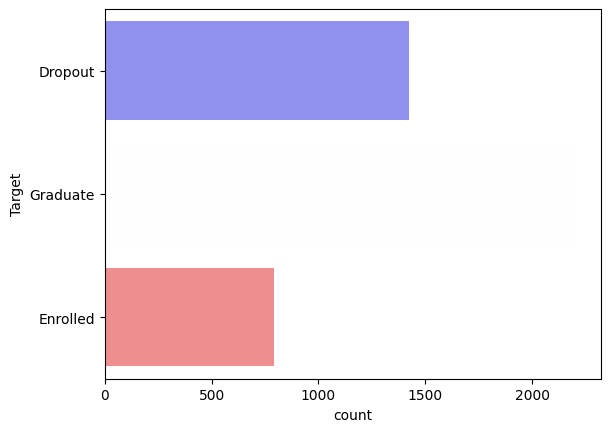

,proportion
Target,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


In [10]:
sns.countplot(data.Target, palette="bwr")
plt.show()
data.Target.value_counts(normalize=True)

## Convert Dropout =0, Graduate=1, Enrolled=3

In [11]:
data = pd.read_csv("dataset.csv", sep=";")
data["Target"]=data.Target.map(dict( Dropout =0, Graduate=1, Enrolled=2))

### select only Dropout and Graduate because the number of Enrolled students is very low

In [12]:
data = data[data['Target'] != 2]

### Read the input and the output

In [13]:
X = data.drop("Target",axis=1)
y = data["Target"]

In [14]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [15]:
y.head()

,Target
0,0
1,1
2,0
3,1
4,1


In [16]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn,direction='forward')
X_new=sfs.fit_transform(X, y)
print(X.columns[sfs.get_support()].to_list())
X=X_new

['Marital status', 'Daytime/evening attendance', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Inflation rate']


<Axes: >

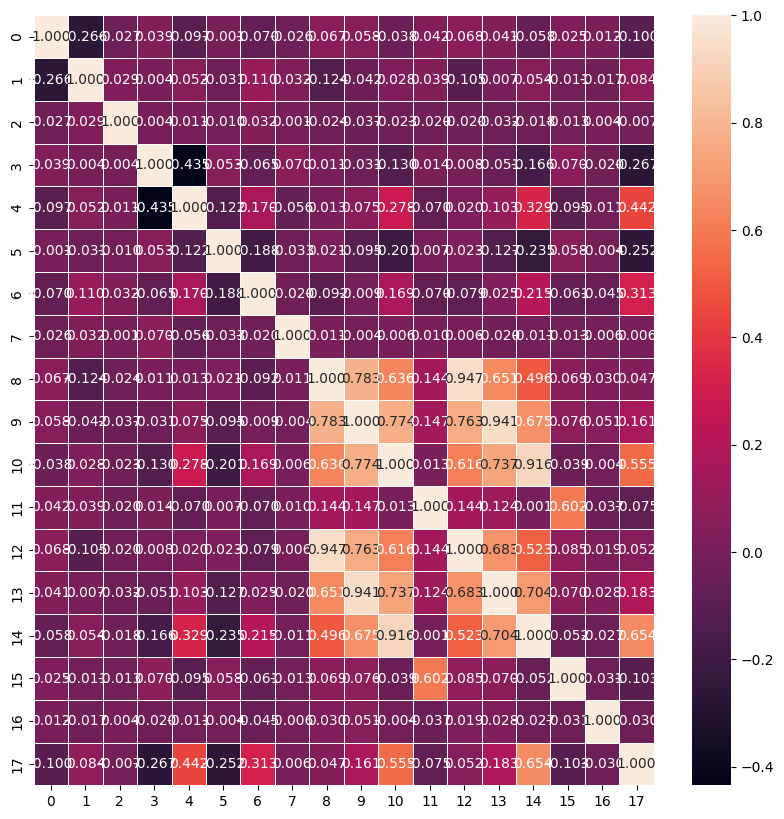

In [17]:
data=np.column_stack([X, y])
data = pd.DataFrame(data)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

## Data scaling

In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit_transform(X)

## Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

## Build models

## Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)
params = {'splitter': ["best", "random"],
          'max_depth': np.arange(1,10,1),
          'min_samples_leaf': np.arange(1,5,1),
          'min_samples_split': np.arange(2,5,1)
         }
cv_dt = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5)
cv_dt.fit(X_train, y_train)
best_DT=cv_dt.best_estimator_
y_pred = best_DT.predict(X_test)
print(cv_dt.best_params_, cv_dt.best_score_)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'} 0.8960045106534512


              precision    recall  f1-score   support

           0     0.9152    0.8367    0.8742       245
           1     0.9203    0.9605    0.9400       481

    accuracy                         0.9187       726
   macro avg     0.9177    0.8986    0.9071       726
weighted avg     0.9186    0.9187    0.9178       726



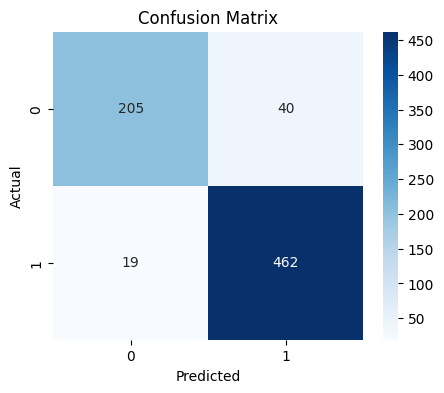

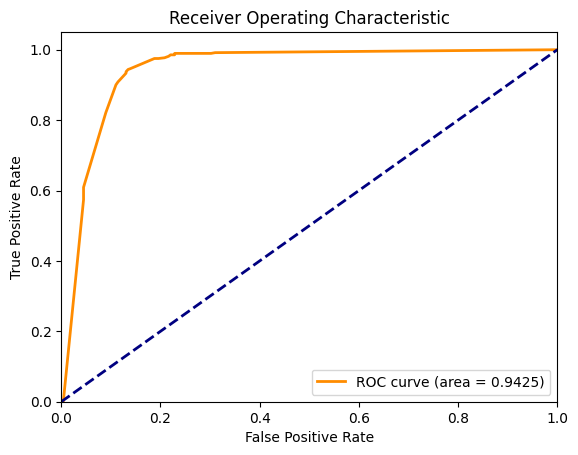

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = best_DT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Random Forest implementation

In [ ]:
model = RandomForestClassifier(random_state=42)
params = {'n_estimators': np.arange(100,500,100)}
cv_rf = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5,verbose=3)
cv_rf.fit(X_train, y_train)
best_RF=cv_rf.best_estimator_
y_pred = best_RF.predict(X_test)
print(cv_rf.best_params_, cv_rf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_estimators': 100} 0.8973832274912457


              precision    recall  f1-score   support

           0     0.9134    0.8612    0.8866       245
           1     0.9313    0.9584    0.9447       481

    accuracy                         0.9256       726
   macro avg     0.9224    0.9098    0.9156       726
weighted avg     0.9253    0.9256    0.9251       726



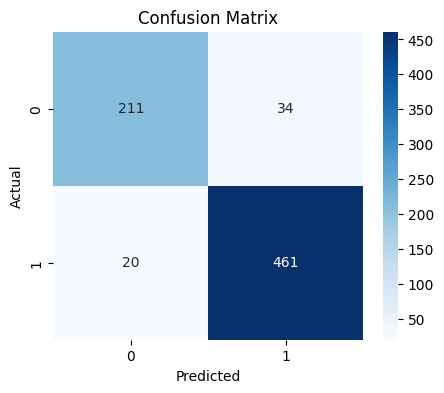

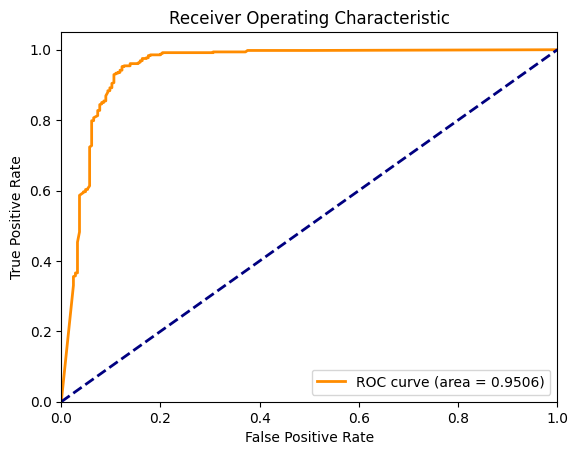

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = best_RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train,y_train)
best_XGB=random_search.best_estimator_
y_pred = best_XGB.predict(X_test)
print(random_search.best_params_, random_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8} 0.9487588872354498


              precision    recall  f1-score   support

           0     0.9292    0.8571    0.8917       245
           1     0.9300    0.9667    0.9480       481

    accuracy                         0.9298       726
   macro avg     0.9296    0.9119    0.9199       726
weighted avg     0.9297    0.9298    0.9290       726



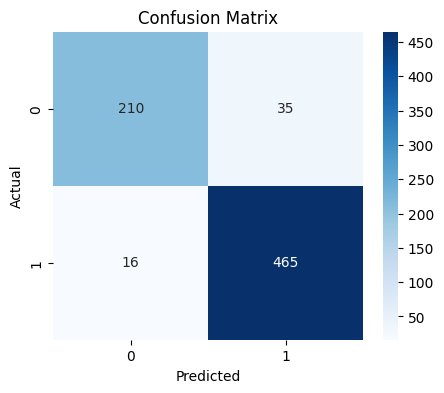

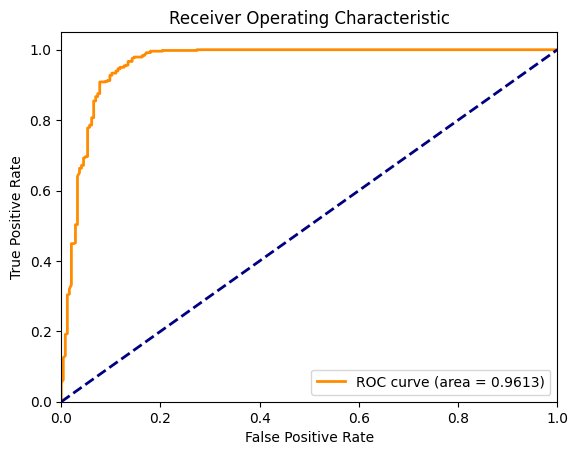

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = best_XGB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## MLP implementation

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels
best_MLP=clf.best_estimator_
y_pred=best_MLP.predict(X_test)

              precision    recall  f1-score   support

           0     0.9174    0.8612    0.8884       245
           1     0.9315    0.9605    0.9458       481

    accuracy                         0.9270       726
   macro avg     0.9244    0.9109    0.9171       726
weighted avg     0.9267    0.9270    0.9264       726



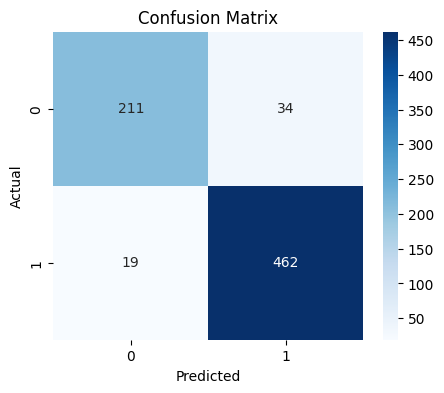

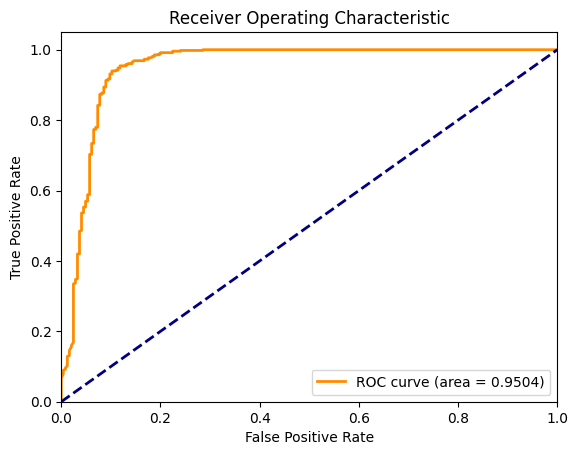

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = best_MLP.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


eclf = VotingClassifier(estimators=[
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ], voting='soft')

#Use the key for the classifier followed by __ and the attribute
params = {'lr__C': [1.0, 100.0],
      'svm__C': [2,3,4],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5,n_jobs=-1, verbose=3)

grid.fit(X_train,y_train)
print (grid.best_params_)
best_VC=grid.best_estimator_
y_pred=best_VC.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'lr__C': 1.0, 'svm__C': 2}


              precision    recall  f1-score   support

           0     0.9372    0.8531    0.8932       245
           1     0.9284    0.9709    0.9492       481

    accuracy                         0.9311       726
   macro avg     0.9328    0.9120    0.9212       726
weighted avg     0.9314    0.9311    0.9303       726



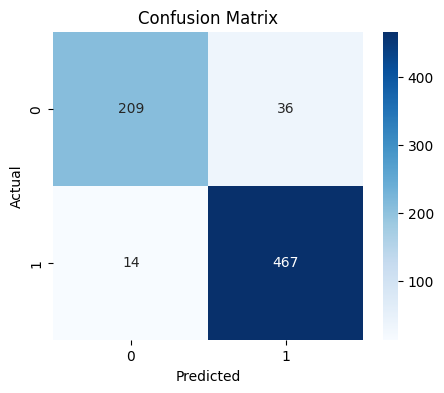

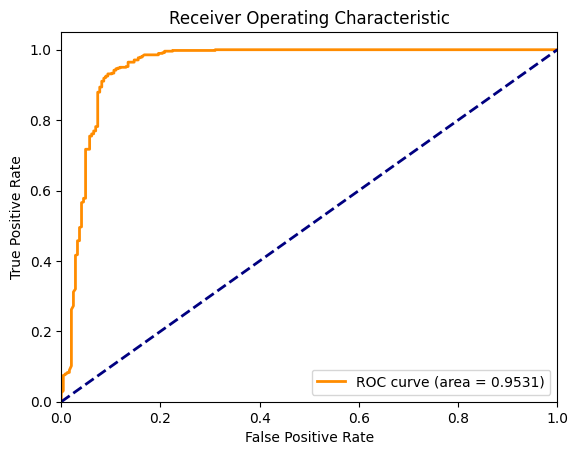

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = best_VC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

# define the base models
level0 = list()
level0.append(('LR', LogisticRegression(C= 0.1, penalty='l2')))
level0.append(('RF',RandomForestClassifier(n_estimators= 300)))
level0.append(('DT', DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random')))
level0.append(('SGD',SGDClassifier(alpha= 0.01)))
level0.append(('XGB',XGBClassifier(subsample= 0.8, min_child_weight= 5, max_depth= 5, gamma= 1, colsample_bytree= 0.8)))
level0.append(('MLP',MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'adam')))
level0.append(('Adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))
level0.append(('bagging',BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))

# define meta learner model
level1= SVC(C= 0.7999999999999999, gamma= 0.04, kernel= 'rbf')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) r

              precision    recall  f1-score   support

           0     0.9621    0.8286    0.8904       245
           1     0.9184    0.9834    0.9498       481

    accuracy                         0.9311       726
   macro avg     0.9403    0.9060    0.9201       726
weighted avg     0.9332    0.9311    0.9297       726



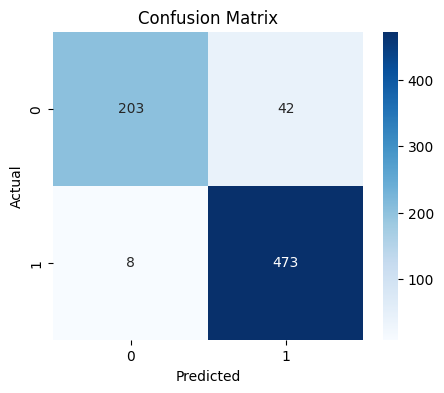

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(probability=True)
params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.5,1,0.1), 'gamma': np.arange(0.01,0.05,0.01)}
cv_svm = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5)
cv_svm.fit(X_train, y_train)
best_SVM=cv_svm.best_estimator_
y_pred = best_SVM.predict(X_test)
print(cv_svm.best_params_, cv_svm.best_score_)

{'C': 0.6, 'gamma': 0.01, 'kernel': 'linear'} 0.9015104753991334


              precision    recall  f1-score   support

           0     0.9667    0.8286    0.8923       245
           1     0.9186    0.9854    0.9509       481

    accuracy                         0.9325       726
   macro avg     0.9426    0.9070    0.9216       726
weighted avg     0.9348    0.9325    0.9311       726



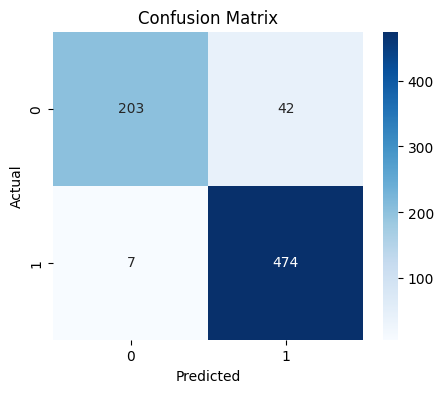

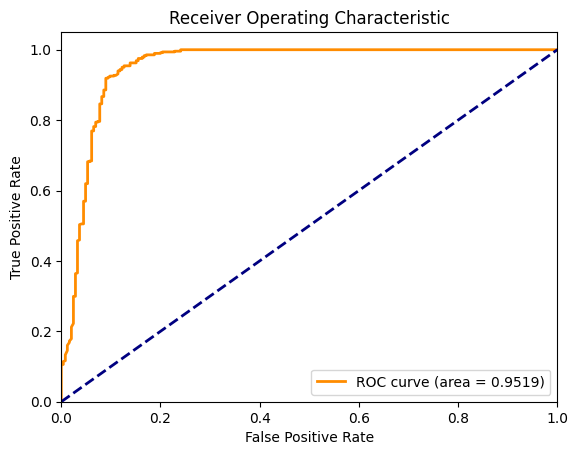

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = best_SVM.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Adaboost , XGboost = 92.5%